# CORRELACION COLCAP Y ACCIONES

## IMPORTACION DE PAQUETES

In [ ]:
# os.chdir("..")
# print(os.getcwd())  # Prints the current working directory


c:\Users\Admin\OneDrive - Universidad de La Salle\SEBASTIAN\PROYECTOS\BVC\PFAVAL


In [1]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import os
import glob
os.chdir("PFAVAL")

### Conteo de archivos

In [2]:
extension = 'csv'
all_files = [i for i in glob.glob('*.{}'.format(extension))]

### Union de archivos en uno solo

In [3]:
#combina todos los archivos de la lista
joined_PFAVAL_csv = pd.concat([pd.read_csv(f) for f in all_files ])
#exporta a csv
joined_PFAVAL_csv.to_csv( "joined_PFAVAL_csv.csv", index=False, encoding='utf-8-sig')  

In [4]:
df_PFAVAL=pd.read_csv("joined_PFAVAL_csv.csv")
df_PFAVAL

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,29.09.2016,"1.245,0","1.260,0","1.260,0","1.245,0","5,15M","-0,80%"
1,28.09.2016,"1.255,0","1.225,0","1.255,0","1.225,0","5,50M","2,87%"
2,27.09.2016,"1.220,0","1.220,0","1.225,0","1.210,0","4,03M","-0,81%"
3,26.09.2016,"1.230,0","1.215,0","1.230,0","1.215,0","1,35M","0,00%"
4,23.09.2016,"1.230,0","1.230,0","1.230,0","1.215,0","3,51M","0,00%"
...,...,...,...,...,...,...,...
4500,06.01.2012,"1.240,0","1.245,0","1.245,0","1.220,0","582,24K","-0,40%"
4501,05.01.2012,"1.245,0","1.245,0","1.245,0","1.230,0","886,07K","-0,40%"
4502,04.01.2012,"1.250,0","1.265,0","1.265,0","1.235,0","535,70K","-1,57%"
4503,03.01.2012,"1.270,0","1.270,0","1.270,0","1.230,0","524,86K","-0,78%"


### Cambio de formato de columna fecha

In [5]:
# Convert the date column to date format
df_PFAVAL["Fecha"] = pd.to_datetime(df_PFAVAL["Fecha"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_9948\1401252242.py:2: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_PFAVAL["Fecha"] = pd.to_datetime(df_PFAVAL["Fecha"])


In [6]:
df_PFAVAL.sort_values(by='Fecha', inplace=True)
df_PFAVAL

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
1313,2011-05-13,"1.295,0","1.315,0","1.320,0","1.295,0","3,06M","-1,52%"
1312,2011-05-16,"1.280,0","1.300,0","1.305,0","1.280,0","1,24M","-1,16%"
1311,2011-05-17,"1.265,0","1.295,0","1.295,0","1.255,0","3,08M","-1,17%"
1310,2011-05-18,"1.300,0","1.270,0","1.305,0","1.270,0","1,14M","2,77%"
1309,2011-05-19,"1.300,0","1.295,0","1.300,0","1.290,0","3,57M","0,00%"
...,...,...,...,...,...,...,...
1318,2025-02-24,"647,0","635,0","660,0","635,0","2,94M","0,78%"
1317,2025-02-25,"645,0","655,0","655,0","645,0","2,09M","-0,31%"
1316,2025-02-26,"634,0","635,0","635,0","617,0","2,42M","-1,71%"
1315,2025-02-27,"620,0","635,0","635,0","620,0","1,47M","-2,21%"


In [7]:
new_rows = pd.DataFrame({"Fecha": ["2025-03-03 00:00:00"], "Último": [584.0], "Apertura":[595.0],"Máximo":[597.0],
                        "Mínimo":[580.0],"Vol.":["1,81M"],"% var.": ["-0,34%"]})
df_PFAVAL = pd.concat([df_PFAVAL, new_rows], ignore_index=True)
df_PFAVAL

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,2011-05-13 00:00:00,"1.295,0","1.315,0","1.320,0","1.295,0","3,06M","-1,52%"
1,2011-05-16 00:00:00,"1.280,0","1.300,0","1.305,0","1.280,0","1,24M","-1,16%"
2,2011-05-17 00:00:00,"1.265,0","1.295,0","1.295,0","1.255,0","3,08M","-1,17%"
3,2011-05-18 00:00:00,"1.300,0","1.270,0","1.305,0","1.270,0","1,14M","2,77%"
4,2011-05-19 00:00:00,"1.300,0","1.295,0","1.300,0","1.290,0","3,57M","0,00%"
...,...,...,...,...,...,...,...
4501,2025-02-25 00:00:00,"645,0","655,0","655,0","645,0","2,09M","-0,31%"
4502,2025-02-26 00:00:00,"634,0","635,0","635,0","617,0","2,42M","-1,71%"
4503,2025-02-27 00:00:00,"620,0","635,0","635,0","620,0","1,47M","-2,21%"
4504,2025-02-28 00:00:00,"586,0","609,0","609,0","586,0","4,77M","-5,48%"


In [16]:
df_PFAVAL["Fecha"] = pd.to_datetime(df_PFAVAL["Fecha"])

In [32]:
df_PFAVAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     4506 non-null   datetime64[ns]
 1   Último    4506 non-null   object        
 2   Apertura  4506 non-null   object        
 3   Máximo    4506 non-null   object        
 4   Mínimo    4506 non-null   object        
 5   Vol.      4504 non-null   object        
 6   % var.    4506 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 246.6+ KB


In [33]:
df_PFAVAL = df_PFAVAL.drop_duplicates(subset=['Fecha'])
df_PFAVAL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3348 entries, 0 to 4505
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3348 non-null   datetime64[ns]
 1   Último    3348 non-null   object        
 2   Apertura  3348 non-null   object        
 3   Máximo    3348 non-null   object        
 4   Mínimo    3348 non-null   object        
 5   Vol.      3347 non-null   object        
 6   % var.    3348 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 209.2+ KB


In [20]:
os.chdir("..")
os.chdir("COLCAP")

In [22]:
print(os.getcwd()) 

c:\Users\Admin\OneDrive - Universidad de La Salle\SEBASTIAN\PROYECTOS\BVC\COLCAP


In [23]:
extension = 'csv'
all_files = [i for i in glob.glob('*.{}'.format(extension))]


#combina todos los archivos de la lista
joined_colcap_csv = pd.concat([pd.read_csv(f) for f in all_files ])
#exporta a csv
joined_colcap_csv.to_csv( "joined_colcap_csv.csv", index=False, encoding='utf-8-sig')  

df_colcap=pd.read_csv("joined_colcap_csv.csv")
df_colcap

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,30.01.2017,"1.364,90","1.372,59","1.372,59","1.361,70",NaN,"-0,56%"
1,27.01.2017,"1.372,59","1.371,38","1.377,78","1.369,10",NaN,"0,09%"
2,26.01.2017,"1.371,38","1.365,24","1.371,39","1.363,82",NaN,"0,45%"
3,25.01.2017,"1.365,24","1.366,91","1.368,29","1.363,50",NaN,"-0,12%"
4,24.01.2017,"1.366,91","1.355,43","1.367,32","1.355,02",NaN,"0,85%"
...,...,...,...,...,...,...,...
4958,07.01.2011,"1.781,71","1.766,32","1.781,71","1.758,30",NaN,"0,85%"
4959,06.01.2011,"1.766,77","1.790,12","1.790,12","1.766,77",NaN,"-1,33%"
4960,05.01.2011,"1.790,57","1.809,17","1.810,81","1.790,57",NaN,"-1,09%"
4961,04.01.2011,"1.810,27","1.805,76","1.810,27","1.785,93",NaN,"0,40%"


In [24]:
df_colcap["Fecha"] = pd.to_datetime(df_colcap["Fecha"])
df_colcap.sort_values(by='Fecha', inplace=True)
df_colcap

C:\Users\Admin\AppData\Local\Temp\ipykernel_9948\2925739991.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_colcap["Fecha"] = pd.to_datetime(df_colcap["Fecha"])


,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
1505,2010-12-01,"1.793,55","1.789,62","1.811,45","1.789,62",NaN,"0,76%"
1504,2010-12-02,"1.825,55","1.801,99","1.825,55","1.795,70",NaN,"1,78%"
1503,2010-12-03,"1.830,26","1.821,97","1.841,12","1.821,97",NaN,"0,26%"
1502,2010-12-06,"1.840,29","1.846,81","1.846,81","1.840,29",NaN,"0,55%"
1501,2010-12-07,"1.837,18","1.858,72","1.858,72","1.837,18",NaN,"-0,17%"
...,...,...,...,...,...,...,...
1510,2025-02-25,"1.648,85","1.652,01","1.655,45","1.643,50",NaN,"-0,15%"
1509,2025-02-26,"1.646,13","1.645,27","1.647,68","1.636,93",NaN,"-0,16%"
1508,2025-02-27,"1.627,96","1.647,91","1.653,12","1.618,42",NaN,"-1,10%"
1507,2025-02-28,"1.607,57","1.626,56","1.627,42","1.607,57",NaN,"-1,25%"


In [31]:
df_colcap = df_colcap.drop_duplicates(subset=['Fecha'])
df_colcap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3478 entries, 1505 to 1506
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     3478 non-null   datetime64[ns]
 1   Último    3478 non-null   object        
 2   Apertura  3478 non-null   object        
 3   Máximo    3478 non-null   object        
 4   Mínimo    3478 non-null   object        
 5   Vol.      0 non-null      float64       
 6   % var.    3478 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 217.4+ KB


In [17]:
df_PFAVAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4506 entries, 0 to 4505
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     4506 non-null   datetime64[ns]
 1   Último    4506 non-null   object        
 2   Apertura  4506 non-null   object        
 3   Máximo    4506 non-null   object        
 4   Mínimo    4506 non-null   object        
 5   Vol.      4504 non-null   object        
 6   % var.    4506 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 246.6+ KB


### Union de los dos dataframe

In [34]:
df_merged = pd.merge(df_colcap, df_PFAVAL, on='Fecha', how='inner', suffixes=('_index', '_stock'))
df_merged

,Fecha,Último_index,Apertura_index,Máximo_index,Mínimo_index,Vol._index,% var._index,Último_stock,Apertura_stock,Máximo_stock,Mínimo_stock,Vol._stock,% var._stock
0,2011-05-13,"1.706,76","1.710,04","1.710,04","1.702,04",NaN,"0,22%","1.295,0","1.315,0","1.320,0","1.295,0","3,06M","-1,52%"
1,2011-05-16,"1.700,03","1.706,35","1.708,17","1.697,45",NaN,"-0,39%","1.280,0","1.300,0","1.305,0","1.280,0","1,24M","-1,16%"
2,2011-05-17,"1.713,15","1.700,16","1.713,15","1.697,16",NaN,"0,77%","1.265,0","1.295,0","1.295,0","1.255,0","3,08M","-1,17%"
3,2011-05-18,"1.710,67","1.713,07","1.719,68","1.710,53",NaN,"-0,14%","1.300,0","1.270,0","1.305,0","1.270,0","1,14M","2,77%"
4,2011-05-19,"1.706,13","1.712,87","1.712,87","1.699,80",NaN,"-0,27%","1.300,0","1.295,0","1.300,0","1.290,0","3,57M","0,00%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3343,2025-02-25,"1.648,85","1.652,01","1.655,45","1.643,50",NaN,"-0,15%","645,0","655,0","655,0","645,0","2,09M","-0,31%"
3344,2025-02-26,"1.646,13","1.645,27","1.647,68","1.636,93",NaN,"-0,16%","634,0","635,0","635,0","617,0","2,42M","-1,71%"
3345,2025-02-27,"1.627,96","1.647,91","1.653,12","1.618,42",NaN,"-1,10%","620,0","635,0","635,0","620,0","1,47M","-2,21%"
3346,2025-02-28,"1.607,57","1.626,56","1.627,42","1.607,57",NaN,"-1,25%","586,0","609,0","609,0","586,0","4,77M","-5,48%"


In [40]:
df_merged['Último_index'] = df_merged['Último_index'].str.replace('.', '')
df_merged['Último_stock'] = df_merged['Último_stock'].str.replace('.', '')

df_merged['Último_index'] = df_merged['Último_index'].str.replace(',', '.')
df_merged['Último_stock'] = df_merged['Último_stock'].str.replace(',', '.')

df_merged['Último_index'] = df_merged['Último_index'].astype(float)
df_merged['Último_stock'] = df_merged['Último_stock'].astype(float)

df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Fecha           3348 non-null   datetime64[ns]
 1   Último_index    3348 non-null   float64       
 2   Apertura_index  3348 non-null   object        
 3   Máximo_index    3348 non-null   object        
 4   Mínimo_index    3348 non-null   object        
 5   Vol._index      0 non-null      float64       
 6   % var._index    3348 non-null   object        
 7   Último_stock    3347 non-null   float64       
 8   Apertura_stock  3348 non-null   object        
 9   Máximo_stock    3348 non-null   object        
 10  Mínimo_stock    3348 non-null   object        
 11  Vol._stock      3347 non-null   object        
 12  % var._stock    3348 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 340.2+ KB


In [35]:
print(df_colcap['Fecha'].duplicated().sum())  # Count duplicate dates in index DataFrame
print(df_PFAVAL['Fecha'].duplicated().sum()) 

0
0


In [ ]:
historic_correlation = df_merged['Último_index'].corr(df_merged['Último_stock'])
print(f"Historic Correlation: {historic_correlation}")

Correlation: 0.6268575255519361


In [ ]:
# Last 20 days (20)
correlation_20d = df_merged.tail(20)['Último_index'].corr(df_merged.tail(20)['Último_stock'])
# Last 60 days (60)
correlation_30d = df_merged.tail(30)['Último_index'].corr(df_merged.tail(30)['Último_stock'])
# Last 100 days (100)
correlation_100d = df_merged.tail(100)['Último_index'].corr(df_merged.tail(100)['Último_stock'])

print(f"Last 20 days Correlation: {correlation_20d}")
print(f"Last 30 days Correlation: {correlation_30d}")
print(f"Last 200 Correlation: {correlation_100d}")

Last 5 days Correlation: 0.9846490253169727
Last 20 days Correlation: 0.953942178010569
Last 100 days Correlation: 0.9866954115667269
Last 200 Correlation: 0.9867278388666554
1-Year Correlation: 0.9700471329100123
3-Year Correlation: 0.5354312220939766


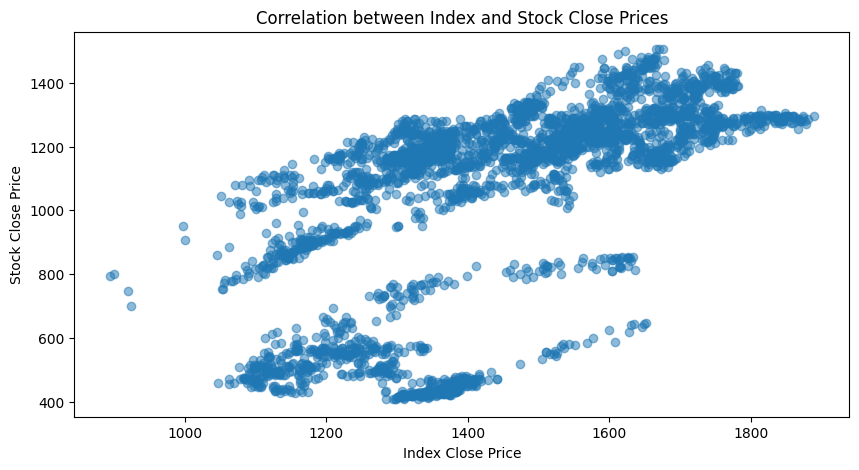

In [42]:
plt.figure(figsize=(10,5))
plt.scatter(df_merged['Último_index'], df_merged['Último_stock'], alpha=0.5)
plt.xlabel("Index Close Price")
plt.ylabel("Stock Close Price")
plt.title("Correlation between Index and Stock Close Prices")
plt.show()